**PIMA Indians Diabetes Dataset**

The PIMA Indians Diabetes Dataset is a well-known dataset in the machine learning community, primarily used for the purpose of binary classification. It originates from a study carried out by the National Institute of Diabetes and Digestive and Kidney Diseases and aims to diagnostically predict whether a patient has diabetes based on certain health metrics. This dataset is particularly significant because of the prevalence of diabetes among the PIMA Indian heritage group.

**Key Features of the Dataset:**

1. **Pregnancies:** Number of times pregnant.
2. **Glucose:** Plasma glucose concentration over 2 hours in an oral glucose tolerance test.
3. **BloodPressure:** Diastolic blood pressure (mm Hg).
4. **SkinThickness:** Triceps skinfold thickness (mm).
5. **Insulin:** 2-Hour serum insulin (mu U/ml).
6. **BMI:** Body mass index (weight in kg/(height in m)^2).
7. **DiabetesPedigreeFunction:** A function that scores the likelihood of diabetes based on family history.
8. **Age:** Age in years.
9. **Outcome:** Class variable (0 if non-diabetic, 1 if diabetic).


### Extraction

Load libraries

In [70]:
# your code
import pandas as pd

Load and show the dataset. Assign names to each column according to the 9 Key Features of the Dataset.

In [71]:
# Load the dataset
df = pd.read_csv('pima-indians-diabetes.data.csv')

# Show the dataset
df.head()

,6,148,72,35,0,33.6,0.627,50,1
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0


In [72]:
# Assign names to each column
features = ["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "DiabetesPedigreeFunction", "Age", "Outcome"]
diabetes = pd.DataFrame(df.values,
                        columns=["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "DiabetesPedigreeFunction", "Age", "Outcome"], 
                        index=pd.RangeIndex(df.index))

In [73]:
# Show the dataset
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0,0.0
1,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0,1.0
2,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0.0
3,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0,1.0
4,5.0,116.0,74.0,0.0,0.0,25.6,0.201,30.0,0.0


### Transformation

Apply data imputation for the columns: Glucose, BloodPressure, SkinThickness, Insulin, and BMI. In this dataset, a zero value is considered a missing value.


In [75]:
# Imputation with SimpleImputer from Sklearn
from sklearn.impute import SimpleImputer

# Replace values with numpy
import numpy as np

# Apply data imputation for this columns:
columns_to_impute = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]

# First we convert zero values to numpy.nan
diabetes[columns_to_impute] = diabetes[columns_to_impute].replace(0, np.nan)

In [76]:
# Select strategy 'median' of each feature
imputer = SimpleImputer(strategy="median")

# Train the imputer and transform the database
diabetes[columns_to_impute] = imputer.fit_transform(diabetes[columns_to_impute])

In [77]:
# Show the 'imputed' values
imputer.statistics_

array([117. ,  72. ,  29. , 125. ,  32.3])

In [78]:
# Show the imputed dataset
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1.0,85.0,66.0,29.0,125.0,26.6,0.351,31.0,0.0
1,8.0,183.0,64.0,29.0,125.0,23.3,0.672,32.0,1.0
2,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0.0
3,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0,1.0
4,5.0,116.0,74.0,29.0,125.0,25.6,0.201,30.0,0.0


Apply feature engineering to create a new data column to categorize the age into three categories.

In [98]:
# Select Ages
ages = diabetes["Age"].tolist()

# Defining the bin edges for different age groups
bin_edges = [0, 29, 55, 100]  # Age ranges: 0-29, 30-55, 56-100

# Using pd.cut() to categorize ages into bins, into new feature
diabetes["ages_cat"] = pd.cut(ages,
                              bins=bin_edges,
                              labels=["0-29", "30-55", "56+"])

diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,ages_cat
0,1.0,85.0,66.0,29.0,125.0,26.6,0.351,31.0,0.0,30-55
1,8.0,183.0,64.0,29.0,125.0,23.3,0.672,32.0,1.0,30-55
2,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0.0,0-29
3,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0,1.0,30-55
4,5.0,116.0,74.0,29.0,125.0,25.6,0.201,30.0,0.0,30-55


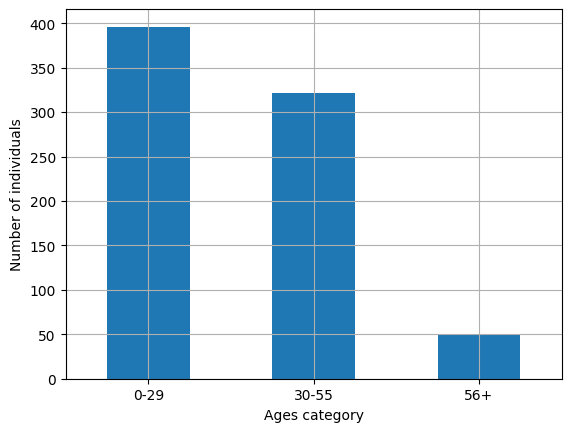

In [103]:
import matplotlib.pyplot as plt

# Showing distribution of new feature grouped
diabetes["ages_cat"].value_counts().sort_index().plot.bar(rot=0, grid=True)
plt.xlabel("Ages category")
plt.ylabel("Number of individuals")
plt.show()

### Load

Load the modified dataset in a CSV and Json format.

In [105]:
# Load modified dataset to CSV
filename_csv = "modified_diabetes.csv"
diabetes.to_csv(filename_csv, index=False)

# Load modified dataset to JSON
filename_json = "modified_diabetes.json"
diabetes.to_json(filename_json, orient="records", lines=True)

print("Modified dataset saved to CSV:", filename_csv)
print("Modified diabetes saved to JSON:", filename_json)

Modified dataset saved to CSV: modified_diabetes.csv
Modified diabetes saved to JSON: modified_diabetes.json
